In [11]:
import pandas as pd

# Load CSV
df = pd.read_csv("api_call_dataset.csv")

print(df.shape)
print(df.columns[:5])  # Check first few column names
print(df["malware"].value_counts())  # Check class balance


(43876, 102)
Index(['hash', 't_0', 't_1', 't_2', 't_3'], dtype='object')
malware
1    42797
0     1079
Name: count, dtype: int64


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare data
X = df.drop(columns=["hash", "malware"])
y = df["malware"]

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train with class weight to handle imbalance
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.50      0.64       216
           1       0.99      1.00      0.99      8560

    accuracy                           0.99      8776
   macro avg       0.93      0.75      0.81      8776
weighted avg       0.98      0.99      0.98      8776



In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [16]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)


Before SMOTE: malware
1    34237
0      863
Name: count, dtype: int64
After SMOTE: malware
1    34237
0    34237
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       216
           1       0.99      1.00      0.99      8560

    accuracy                           0.99      8776
   macro avg       0.88      0.78      0.82      8776
weighted avg       0.98      0.99      0.98      8776



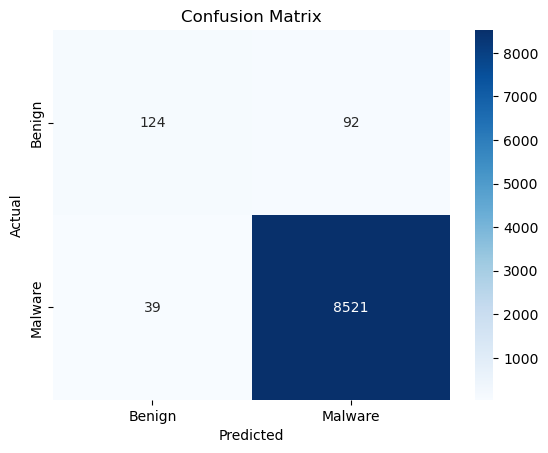

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("api_call_dataset.csv")

# 2. Separate features and labels
X = df.drop(columns=["hash", "malware"])
y = df["malware"]

# 3. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

# 5. Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# 6. Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
df = pd.read_csv("api_call_dataset.csv")
X = df.drop(columns=["hash", "malware"])
y = df["malware"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE on the training set
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Normalize features for ANN
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define and train the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam',
                          max_iter=300, early_stopping=True, random_state=42)

ann_model.fit(X_resampled_scaled, y_resampled)

# Make predictions
y_pred = ann_model.predict(X_test_scaled)

# Evaluation
print("Classification Report (ANN):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (ANN):")
print(confusion_matrix(y_test, y_pred))


Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       216
           1       0.99      0.99      0.99      8560

    accuracy                           0.98      8776
   macro avg       0.84      0.79      0.81      8776
weighted avg       0.98      0.98      0.98      8776

Confusion Matrix (ANN):
[[ 126   90]
 [  55 8505]]


In [21]:
from xgboost import XGBClassifier

# Train the model
model = XGBClassifier(
    scale_pos_weight=1,  # Can be adjusted based on class imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_resampled, y_resampled)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



D:\Apps\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:16:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.77      0.68      0.72       216
           1       0.99      0.99      0.99      8560

    accuracy                           0.99      8776
   macro avg       0.88      0.84      0.86      8776
weighted avg       0.99      0.99      0.99      8776



In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define base model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1]  # You can also test malware/benign ratio here
}


In [23]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',  # Balanced F1 across both classes
    cv=3,
    verbose=2,
    n_jobs=-1  # Use all cores
)

# Fit on balanced data (SMOTE-applied)
grid_search.fit(X_resampled, y_resampled)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


D:\Apps\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1}


🔍 Final Evaluation Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       216
           1       0.99      1.00      0.99      8560

    accuracy                           0.99      8776
   macro avg       0.89      0.82      0.85      8776
weighted avg       0.99      0.99      0.99      8776



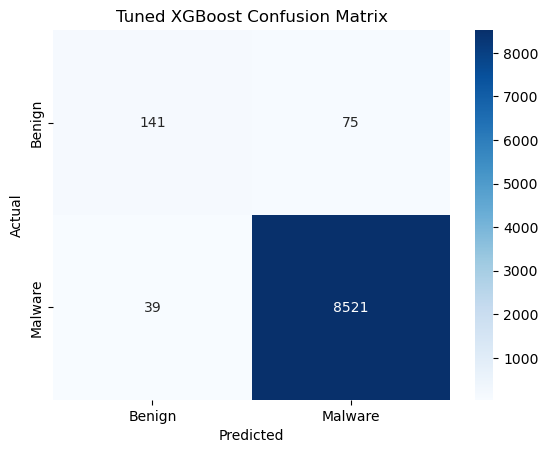

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model
y_pred = best_model.predict(X_test)

# Show report
print("🔍 Final Evaluation Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned XGBoost Confusion Matrix")
plt.show()


Epoch 1, Loss: 89.5771
Epoch 2, Loss: 44.7290
Epoch 3, Loss: 28.4742
Epoch 4, Loss: 48.0418
Epoch 5, Loss: 32.7797
Epoch 6, Loss: 25.7675
Epoch 7, Loss: 23.3309
Epoch 8, Loss: 17.7993
Epoch 9, Loss: 16.1182
Epoch 10, Loss: 13.7395

Classification Report (LSTM):
              precision    recall  f1-score   support

           0     0.6586    0.7593    0.7054       216
           1     0.9939    0.9901    0.9920      8560

    accuracy                         0.9844      8776
   macro avg     0.8263    0.8747    0.8487      8776
weighted avg     0.9856    0.9844    0.9849      8776



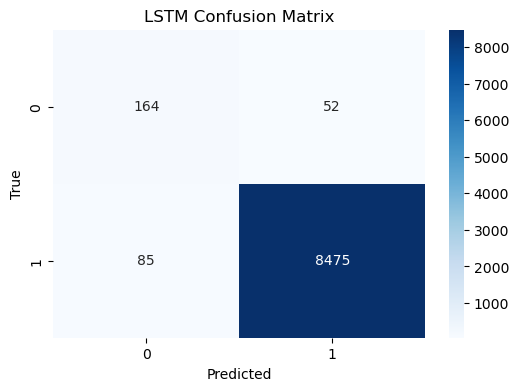

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode API tokens as integers (Label Encoding)
from sklearn.preprocessing import LabelEncoder

X_seq = df.iloc[:, :-1].astype(str).values  # Only API call tokens
y = df['malware'].values

# Flatten and encode all tokens
encoder = LabelEncoder()
X_seq_flat = X_seq.flatten()
encoder.fit(X_seq_flat)
X_seq_encoded = encoder.transform(X_seq_flat).reshape(X_seq.shape)

# Convert to torch tensors
X_tensor = torch.tensor(X_seq_encoded, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into train/test (80/20 stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, stratify=y_tensor, random_state=42
)

# Apply SMOTE to training set
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_np = X_train.numpy()
y_train_np = y_train.numpy()
X_train_res, y_train_res = sm.fit_resample(X_train_np, y_train_np)

# Convert back to tensor
X_train_res = torch.tensor(X_train_res, dtype=torch.long)
y_train_res = torch.tensor(y_train_res, dtype=torch.long)

# Define Dataset and DataLoader
from torch.utils.data import Dataset, DataLoader

class APIDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = APIDataset(X_train_res, y_train_res)
test_dataset = APIDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

# Define LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        out = self.fc(self.dropout(h_n[-1]))
        return out

vocab_size = len(encoder.classes_)
model = LSTMClassifier(vocab_size, embed_dim=64, hidden_dim=128, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(10):  # Increase epochs if needed
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Evaluate the model
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.numpy())

# Classification report
print("\nClassification Report (LSTM):")
print(classification_report(all_labels, all_preds, digits=4))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LSTM Confusion Matrix")
plt.show()
